# Executive Summary

# High Level Goal

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

My Takeaway: Fundamentally, our goal is to
* A. _help understand the determinants of crime_
* B. _make informed policy suggestions accordingly_

_A_ will be a statistical task, and doing _B_ will be require us to wear socio-political hats. Presumably, the interest of our audience, a political campaign is to pitch itself to the public for election using informed policy ideas for _reducing_ crime.

In order to A, we must identify a measurable proxy for crime. I think that the most natural choice for this is the variable `crmrte` giving the crimes committed per person.


In [3]:
# Load the data
crime <- read.csv('crime_v2.csv')

## Exploratory Cleaning

Checking for missing values.

In [4]:
summary(is.na(crime))

   county           year           crmrte          prbarr       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
  prbconv         prbpris          avgsen          polpc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:97        FALSE:91        FALSE:91        FALSE:91       
                 TRUE :6         TRUE :6         TRUE :6        
  density          taxpc            west          central       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
   urban          pctmin80          wcon            wtuc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6 

The output of the summary of missing values reveals that every column has precisely 6 missing values.

In [5]:
crime[91:nrow(crime), ]
paste0("Number of missing values in first 92 rows: ", sum(is.na(crime[1:91, ])))

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.889881,25.95258,...,341.8803,182.802,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Number of missing values in first 92 rows: 0"

The last 6 rows are filled exclusively with `NA`s, while all the rows up to and including the 91st contain no missing values. Therefore, we will omit the existing `NA`s with no loss of important information. 

In [6]:
crime <- na.omit(crime)

Now, we will have a quick look at the variables' data types.

In [7]:
str(crime)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

All of the variables in this dataset aside are conceptually numeric, but the probabilty of conviction, `prbarr` has been inferred as a factor. Therefore, it is necessary to cast it as a numeric variable.

In [8]:
crime$prbconv <- as.numeric(crime$prbconv)

Additionally, we will remove the `county` and `year` variables because `year` is a constant, and because the counties' unique numerical identifiers will not be relevant to any analysis.

In [9]:
crime <- crime[!names(crime) %in% c('year', 'county')]

Lastly, we will take a look at the variable summaries to see whether the data is within normal bounds.

In [10]:
summary(crime)

     crmrte             prbarr           prbconv         prbpris      
 Min.   :0.005533   Min.   :0.09277   Min.   : 3.00   Min.   :0.1500  
 1st Qu.:0.020927   1st Qu.:0.20568   1st Qu.:25.50   1st Qu.:0.3648  
 Median :0.029986   Median :0.27095   Median :48.00   Median :0.4234  
 Mean   :0.033400   Mean   :0.29492   Mean   :47.75   Mean   :0.4108  
 3rd Qu.:0.039642   3rd Qu.:0.34438   3rd Qu.:70.00   3rd Qu.:0.4568  
 Max.   :0.098966   Max.   :1.09091   Max.   :92.00   Max.   :0.6000  
     avgsen           polpc              density            taxpc       
 Min.   : 5.380   Min.   :0.0007459   Min.   :0.00002   Min.   : 25.69  
 1st Qu.: 7.340   1st Qu.:0.0012308   1st Qu.:0.54741   1st Qu.: 30.66  
 Median : 9.100   Median :0.0014853   Median :0.96226   Median : 34.87  
 Mean   : 9.647   Mean   :0.0017022   Mean   :1.42884   Mean   : 38.06  
 3rd Qu.:11.420   3rd Qu.:0.0018768   3rd Qu.:1.56824   3rd Qu.: 40.95  
 Max.   :20.700   Max.   :0.0090543   Max.   :8.82765   Max.   :1

While most of the data appears within normal bounds, it comes to our attention that some of the probability variables, namely `prbarr` and `prbconv`, are outside of expected bounds. Their summaries are as follows:


In [11]:
print('Probaility of arrest summary:')
summary(crime$prbarr)
print('Probability of conviction summary:')
summary(crime$prbconv)

[1] "Probaility of arrest summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

[1] "Probability of conviction summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.50   48.00   47.75   70.00   92.00 

All counties probability of conviction values are bounded between 0 and 100, so we speculate that these numbers are percentages, and not probabilities. Thus, we will transform `prbconv` by scaling it by $1/100$.

In [12]:
crime$prbconv <- 1.0/100 * crime$prbconv

Additionally, while most of the probability of arrest values are between 0 and 1, the maximum values of the column is 1.09, outside the bounds of a probability. Thus will will have a closer look at the distribtion of `prbconv`.

[1] "Number of values greater than 1: 1"

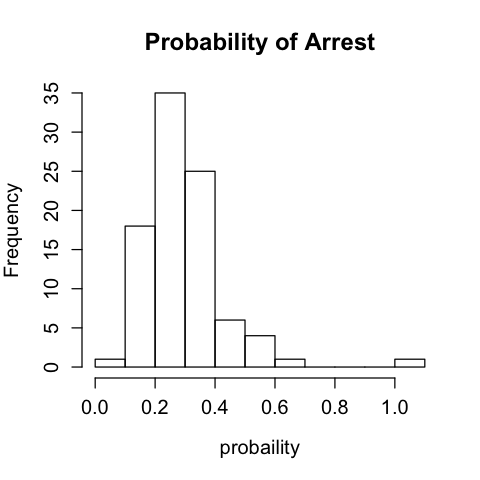

In [13]:
options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
hist(crime$prbarr, main = 'Probability of Arrest', xlab='probaility')
paste0('Number of values greater than 1: ', sum(crime$prbarr > 1.0))

Since there is only one probability value greater than 1, we speculate that it is the result of a mistranscription, in which the data collecter input `1.09` instead of the intended `0.09`. Thus we will go ahead and change the value accordingly.

[1] "Number of values greater than 1: 0"

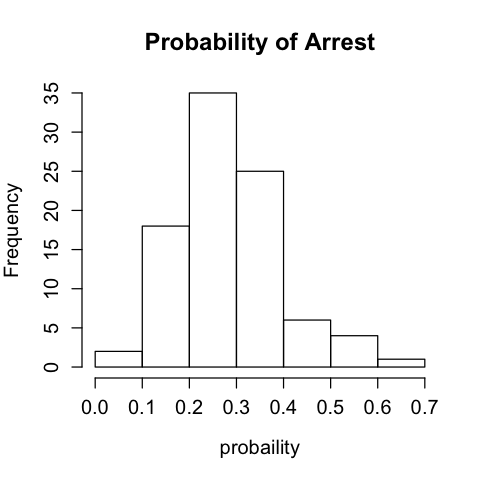

In [14]:
crime$prbarr[crime$prbarr > 1.0] <- crime$prbarr[crime$prbarr > 1.0] - 1 

options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
hist(crime$prbarr, main = 'Probability of Arrest', xlab='probaility')
paste0('Number of values greater than 1: ', sum(crime$prbarr > 1.0))

# Intended Models

## Model 1: 
$crmrte = \beta_0 + \beta_1log(density + 1) + \beta_2polpc + \beta_3wfed + e$

The first model will regresses crime rate (`crmrate`) on log-density (`density`), police per capita (`polpc`) and federal wage (`wfed`). We consider density, police per capita and federal wage the key explanatory variables of interest.

*  `density`
    * description: Average number of people per square mile in a given county.
    * range: `[0.00002, 8.83]`
    
* `polpc`
    * description: Police per capita in a given county.
    * range: `[0.00075, 0.0091]`
* `wfed`
    * description: Average weekly wage of Federal employees in a given county.
    * range: `[326.1, 598.0]`
    
The next section contains the exploratory analysis supporting this choice of variables in this baseline model:

## EDA of Key Choice Variables

#### Spearman Correlations with Crime Rate

In [15]:
round(cor(crime, method = 'spearman'), 2)[, 'crmrte']

crmrte   prbarr  prbconv  prbpris   avgsen    polpc  density    taxpc 
    1.00    -0.28    -0.35     0.00     0.09     0.53     0.66     0.22 
    west  central    urban pctmin80     wcon     wtuc     wtrd     wfir 
   -0.40     0.19     0.45     0.29     0.38     0.21     0.32     0.21 
    wser     wmfg     wfed     wsta     wloc      mix  pctymle 
    0.31     0.46     0.53     0.11     0.37     0.03     0.34

The variables `density`, `urban`, `polpc` and `wfed`, which represent people per square mile, an indicator for an urban county, police per capita and the average weekly wage of federal employees, respectively, have the highest spearman correlations with crime rate in magnitude. This result suggests that some of these variables could be the key derminants of crime rate while the others important variables to control for when understanding crime.

In [16]:
print('Covariance of density, urban, polpc and wfed: ')
round(cor(crime[,c('density', 'urban', 'polpc', 'wfed')]), 2)

[1] "Covariance of density, urban, polpc and wfed: "


,density,urban,polpc,wfed
density,1.00,0.82,0.16,0.59
urban,0.82,1.00,0.16,0.42
polpc,0.16,0.16,1.00,0.16
wfed,0.59,0.42,0.16,1.00


The strong correlation between `urban` and `density` is unsurprising because urban cities are dense clusters of people. As such, we will not include `urban` in the baseline model as it does not offer much information that isn't already provided by `density`. <br>
Thus, the key explanatory variables to be included in the baseline model are:
* `density`
* `polpc`
* `wfed`

### Explaining Crime Rate and Key Explanatory Variables
### Specifying the Functional Form to Optimize Linearity of Regressors

In an effort to optimize our baseline model, we will check to see whether the relationship between crime rate and any of the key explanatory variables appears linear or is best represnted using a transformation.

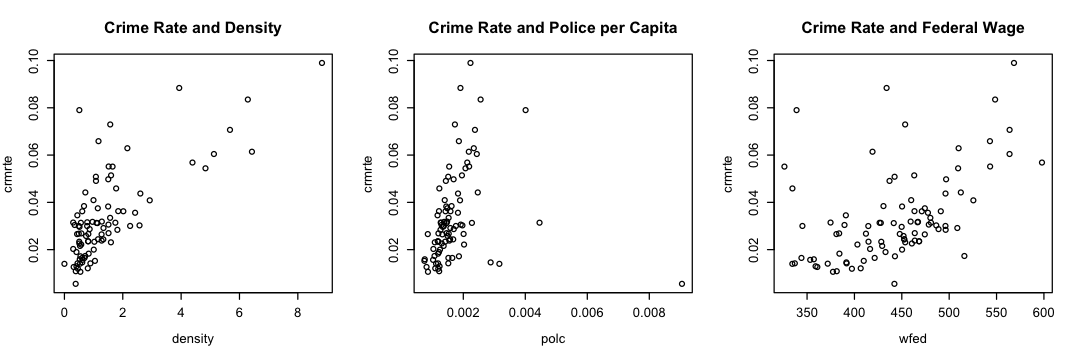

In [17]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(crime[,'density'], crime[,'crmrte'], xlab = 'density', ylab = 'crmrte', main='Crime Rate and Density')
plot(crime[, 'polpc'], crime[,'crmrte'], xlab = 'polc', ylab = 'crmrte',  main='Crime Rate and Police per Capita')
plot(crime[,'wfed'], crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte',  main='Crime Rate and Federal Wage')

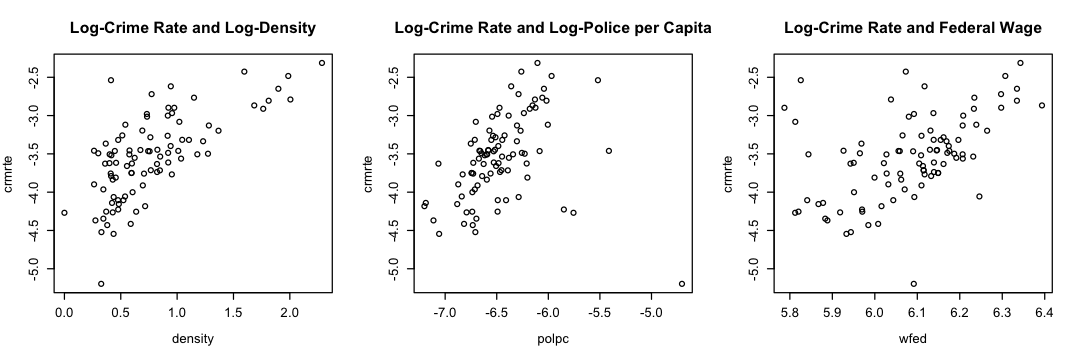

In [18]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), log(crime[,'crmrte']), xlab = 'density', ylab = 'crmrte',  
     main='Log-Crime Rate and Log-Density')
plot(log(crime[, 'polpc']), log(crime[,'crmrte']), xlab = 'polpc', ylab = 'crmrte', 
     main='Log-Crime Rate and Log-Police per Capita')
plot(log(crime[,'wfed']), log(crime[,'crmrte']), xlab = 'wfed', ylab = 'crmrte', 
     main='Log-Crime Rate and Federal Wage')

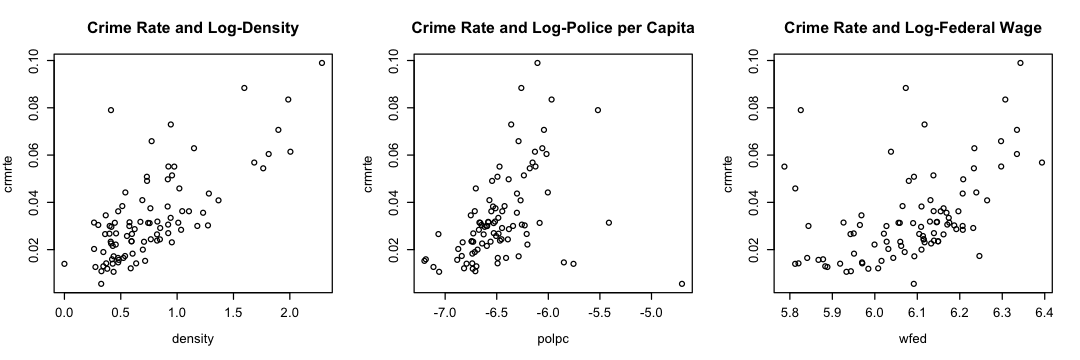

In [19]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), crime[,'crmrte'], xlab = 'density', ylab = 'crmrte', 
    main = 'Crime Rate and Log-Density')
plot(log(crime[, 'polpc']), crime[,'crmrte'], xlab = 'polpc', ylab = 'crmrte',
    main = 'Crime Rate and Log-Police per Capita')
plot(log(crime[,'wfed']), crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte', 
     main='Crime Rate and Log-Federal Wage')

After examination of the log transformations, we decide that we will regress crime rate on the log tranformation of density: $density \to log(density + 1)$ because its relationship with crime appears to be most linear. Moreover, we shifted density by 1 because some of the density values are negative, which can not be transformed by a log.

In [20]:
# adding log density as a variable
crime$log.density <- log(crime$density + 1)

## Fitting Model 1

In [21]:
model.1 <- lm(crmrte ~ log.density + polpc + wfed, data = crime)

With the `polpc` outlier included, we observe the following baseline model results:

In [22]:
summary(model.1)


Call:
lm(formula = crmrte ~ log.density + polpc + wfed, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025155 -0.008605 -0.002926  0.007159  0.052984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.825e-03  1.181e-02   0.663    0.509    
log.density  3.056e-02  4.103e-03   7.448 6.47e-11 ***
polpc        1.467e+00  1.406e+00   1.043    0.300    
wfed        -8.832e-07  3.070e-05  -0.029    0.977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01299 on 87 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.5231 
F-statistic: 33.91 on 3 and 87 DF,  p-value: 1.302e-14


Obervations:
* The model explains approximately 52% of the variance in the data.
* `density` is the only significant predictor at the 5% significance level. 

## Assessing CLM Assumptions

1. Linearity: <br>
Through our Exploratory Data Analysis, we chose a reasonably linear specification. We included the regressor variables most strongly correlated with crime rate.


2. Random Sampling: <br>
We can infer that because there are 97 data points, out of 100 possible counties in the state, that the researchers intended to complete a census of the population of counties in the state. However, because data from a few counties was inaccessible, they limited the study to a convenience sample of the remaining counties. Since over 5% of the population was sampled, we can not reasonably argue that the data was collected from a random sample. Nonetheless, with over 90% of counties in the state represented, we can conclude that the results of our models will offer useful insights into the causal factors behind crime rate on a statewide level. We assume that the inavailability of data in some counties is not connected to the crime rates therein in any significant way.


3. No Perfect Multicollinearity


4. Zero Conditional Mean
5. Homoscedasticity
6. Normality of Errors

Assumptions #4-6 can be addressed through a series of diagnostic plots, as shown below.

#### Model 1 Diagnostic Plots

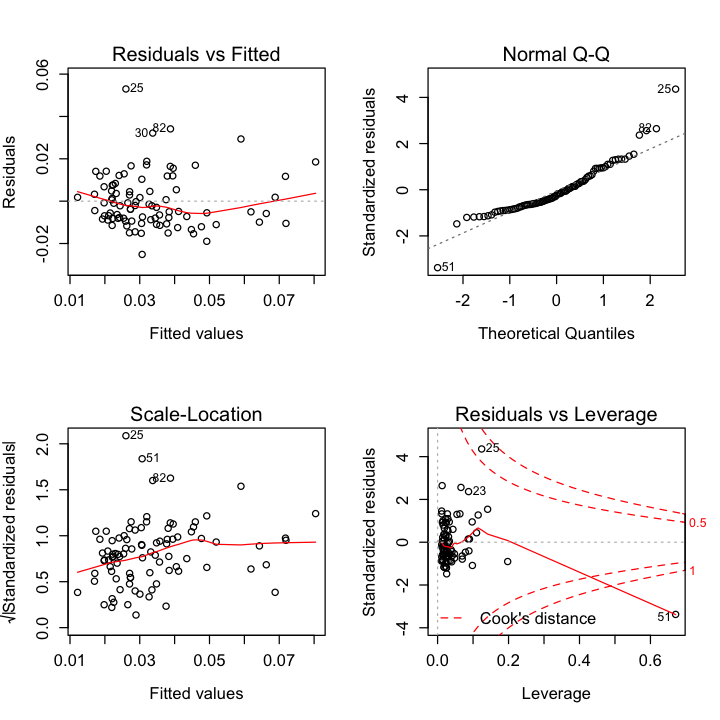

In [23]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1)

Observations:
* a) The parabolic shape of the splice curve in the residual vs fitted plot suggest that at least one of the key explnatory variables is exogenous.
* b) The scale location plot suggest that the residuals are heteroscedastic
* c) The normal Q-Q plot suggest that the distribution of residuals is non-normal. 
* d) The Residuals vs leverage plot suggests that obbservation 51 is an outlier that has greatly influenced the model.

Responses:
4. Zero Conditional Mean: <br> To address a violation of zero conditional mean, we will try to include new regressors in our model to reduce the explanatory power of the error term.
5. Heteroskedasticity: <br> To address the model's heteroscedasticity, we will use heteroscedasticity-robust standard errors when making inferences about the coefficients.
6. Normality of Errors: <br> Although the distribution of residuals is non-normal, the plot also suggests that the skew of the residual distribution is not extreme. This observation, together with the sample size of 91 (greater than 30), lets us invoke the Central Limit Theorem and be confident that the sampling distribution of the model's coefficients is normal.


# Model V2

$$crmrte \sim \beta_0 + \beta_1log(density +1) + \beta_2polpc + \beta_3wfed + \beta_4pctymle  + \beta_5prbconv + e$$

Our second model includes the key variables of interest from our first regression, plus a few more. This model regresses crime rate (`crmrate`) on log-density (`density`), police per capita (`polpc`), federal wage (`wfed`), percent youth male (`pctymle`), and probability of conviction (`prbconv`).

We believe these additional variables (percent youth male (`pctymle`), and probability of conviction (`prbconv`)) will increase the accuracy of our results without introducing substantial bias.

*  `pctymle`
    * description: The proportion of the population that is male and between the ages of 15 and 24.
    * range: `[0.06216, 0.24871] `
    
* `prbconv`
    * description: The ratio of convictions to arrests.
    * range: `[3.00, 92.00]`

    
The next section contains the exploratory analysis supporting this choice of additional variables in our new model:

## EDA of Model 2 Variables

To start, we ran the correlations on crime rate for the remaining variables in the dataset which we did not analyze in model 1:

In [27]:
examined.cols <- c('log.density', 'density', 'polpc', 'urban', 'wfed')
model2_correlations <- round(cor(crime[,!names(crime) %in% examined.cols], method = 'spearman')[, 'crmrte'], 2)
print('Summary of variable correlations with crime rate:')
summary(model2_correlations)

round(cor(crime[,!names(crime) %in% examined.cols], method = 'spearman')[, 'crmrte'], 2)

[1] "Summary of variable correlations with crime rate:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.4000  0.0600  0.2100  0.1842  0.3300  1.0000 

crmrte   prbarr  prbconv  prbpris   avgsen    taxpc     west  central 
    1.00    -0.28    -0.35     0.00     0.09     0.22    -0.40     0.19 
pctmin80     wcon     wtuc     wtrd     wfir     wser     wmfg     wsta 
    0.29     0.38     0.21     0.32     0.21     0.31     0.46     0.11 
    wloc      mix  pctymle 
    0.37     0.03     0.34

The variables we chose to screen for model 2 all had a correlation with crmrte that is higher than 0.33 in absolute value, which puts them in the top quartile of the dataset in terms of the strongest linear relationships with crime rate. These variables included perpctymle, prbconv, wcon, wloc, and wmfg.

To screen these new potential covariates, we cross reference them to check for any potential multicollinearity concerns with previous regressors.

In [28]:
new.cols <- c('prbconv', 'wcon', 'wmfg', 'wloc', 'pctymle')
round(cor(crime)[new.cols, examined.cols[examined.cols != 'urban']], 2)

,log.density,density,polpc,wfed
prbconv,-0.29,-0.30,-0.03,0.02
wcon,0.49,0.45,-0.02,0.51
wmfg,0.46,0.44,0.27,0.51
wloc,0.48,0.45,0.38,0.52
pctymle,0.18,0.12,0.05,-0.06


Seeing that the three wage variables are relatively highly correlated with wfed (all have correlation above 0.5), we chose to not include these variables in Model 2. These variables are associated with crime, but may be more related to other regressors than to crime rate itself.

### Specifying the Functional Form to Optimize Linearity of Regressors

So, now that we have narrowed down our new regressors to `pctymle` and `prbconv`, we check whether the linear relationships between these variables and the crime rate variable are higher with our without a log transformation.

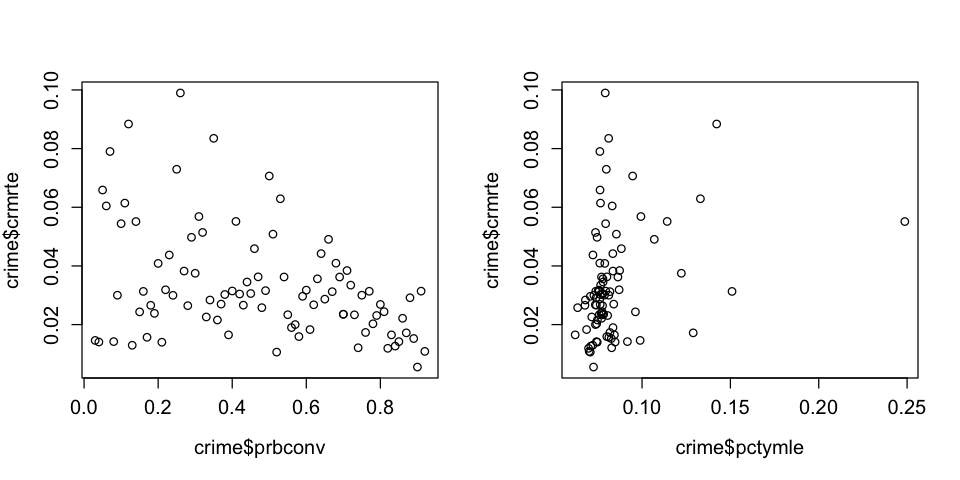

In [29]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(crime$pctymle, crime$crmrte)

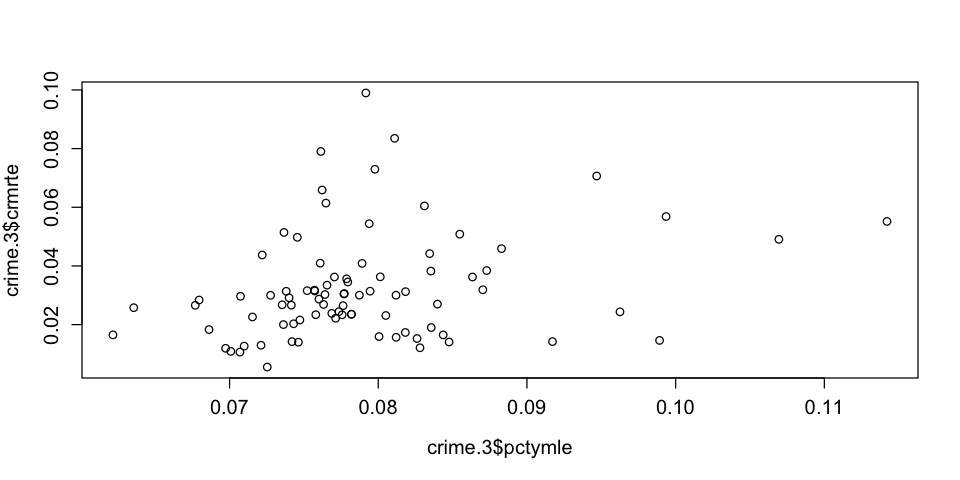

In [30]:
##In this code we show the plot for crime rate on percent youth male, omitting the outlier
crime.3 <- crime[crime$pctymle < 0.12,]
plot(crime.3$pctymle, crime.3$crmrte)

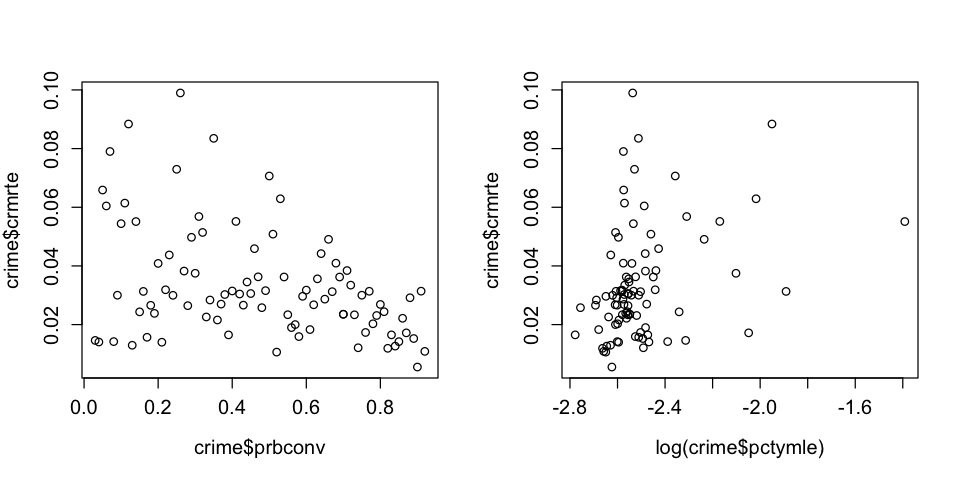

In [31]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(log(crime$pctymle), crime$crmrte)

## Fitting Model 2

In [44]:
model.2 <- lm(crmrte ~ log(density+1) + polpc + wfed + prbconv + pctymle, data = crime)

This model produces the following summary:

In [45]:
summary(model.2)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed + prbconv + 
    pctymle, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019899 -0.008439 -0.002210  0.007370  0.049976 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.825e-03  1.321e-02  -0.517   0.6067    
log(density + 1)  2.352e-02  4.313e-03   5.454 4.76e-07 ***
polpc             1.243e+00  1.324e+00   0.939   0.3506    
wfed              3.845e-05  3.080e-05   1.248   0.2153    
prbconv          -1.487e-02  5.420e-03  -2.744   0.0074 ** 
pctymle           1.205e-01  5.836e-02   2.065   0.0419 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01221 on 85 degrees of freedom
Multiple R-squared:  0.6019,	Adjusted R-squared:  0.5785 
F-statistic:  25.7 on 5 and 85 DF,  p-value: 1.042e-15


Obervations:
* The model explains approximately 58% of the variance in the data, according to Adjusted R-squared.
* `density` is the only significant predictor at the 0.1% significance level. 
* `prbconv` is additionally significant at the 1% significance level.
* `pctymle` is additionally significant at the 5% significance level.

## Assessing CLM Assumptions

The arguments for linearity (MLR.1) and random sampling (MLR.2) made under Model 1 still hold.

Here we will test Model 2 for multicollinearity (MLR.3).


Again, CLM assumptions #4-6 should be addressed through a series of diagnostic plots.

### Model 2 Diagnostic Plots

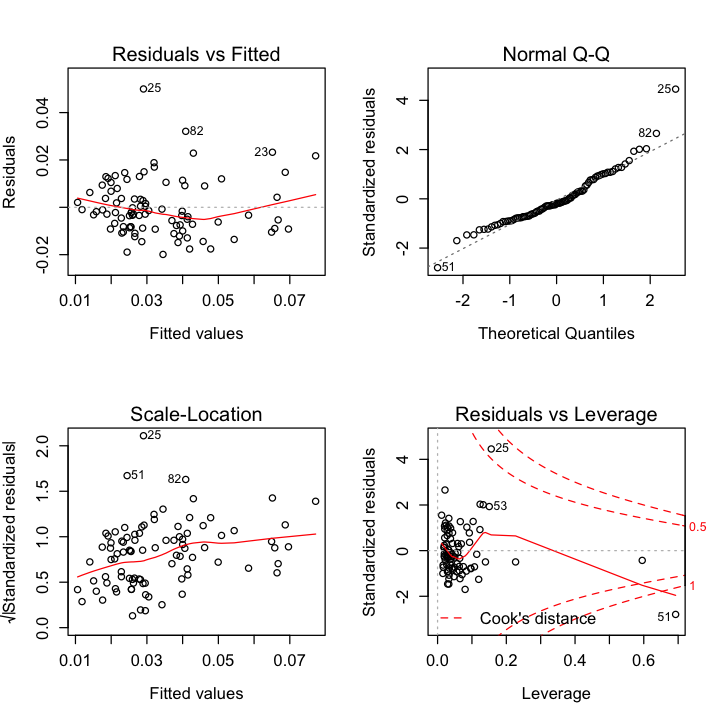

In [47]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2)

Observations:
* a) The parabolic shape of the splice curve in the residual vs fitted plot suggest that at least one of the key explnatory variables is exogenous.
* b) The scale location plot suggest that the residuals are heteroscedastic
* c) The normal Q-Q plot suggest that the distribution of residuals is non-normal. 
* d) The Residuals vs leverage plot suggests that obbservation 51 is an outlier that has greatly influenced the model.

With similar observations to our first model, our responses to these concerns are the same as before.
Responses:
4. Zero Conditional Mean: <br> To address a violation of zero conditional mean, we will try to include new regressors in our model to reduce the explanatory power of the error term.
5. Heteroskedasticity: <br> To address the model's heteroscedasticity, we will use heteroscedasticity-robust standard errors when making inferences about the coefficients.
6. Normality of Errors: <br> Although the distribution of residuals is non-normal, the plot also suggests that the skew of the residual distribution is not extreme. This observation, together with the sample size of 91 (greater than 30), lets us invoke the Central Limit Theorem and be confident that the sampling distribution of the model's coefficients is normal.


# Model V3

$crmrte \sim \beta_0 + \beta_1log(density +1) + \beta_2polpc + \beta_3wfed + \beta_4pctymle  + \beta_5prbconv + \beta_6prbarr + \beta_7prbpris + \beta_8avgsen + \beta_9taxpc + \beta_{10}west + \beta_{11}central + \beta_{12}urban + \beta_{13}pctmin80 + \beta_{14}wcon + \beta_{15}wtuc + \beta_{16}wtrd + \beta_{17}wfir + \beta_{18}wser + \beta_{19}wmfg + \beta_{20}wsta + \beta_{21}wloc + \beta_{22}mix + e$

Our third model includes all covariates in the dataset.

## EDA of Model 3 Variables

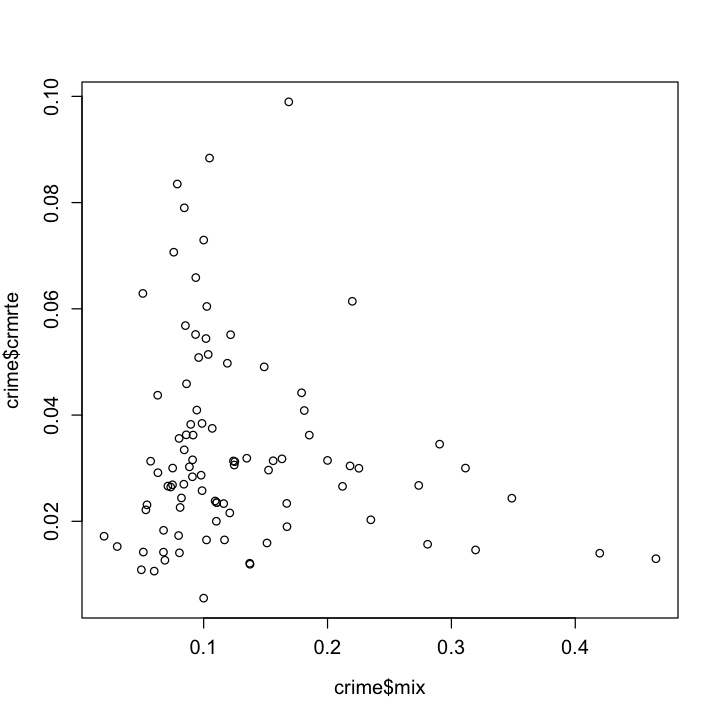

In [49]:
plot(crime$mix, crime$crmrte)

### Specifying the Functional Form to Optimize Linearity of Regressors

## Fitting Model 3

In [51]:
crime.2 <-  crime[ ,!names(crime) %in% c('density')]
model.3 <- lm(crmrte ~ ., data  = crime.2)

The summary of model 3 is as follows:

In [52]:
summary(model.3)


Call:
lm(formula = crmrte ~ ., data = crime.2)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0177399 -0.0054306 -0.0000782  0.0043193  0.0233683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.326e-03  2.039e-02  -0.359 0.720454    
prbarr      -4.669e-02  1.211e-02  -3.855 0.000260 ***
prbconv     -1.426e-02  5.144e-03  -2.771 0.007191 ** 
prbpris     -2.287e-03  1.295e-02  -0.177 0.860334    
avgsen      -7.210e-04  4.325e-04  -1.667 0.100113    
polpc        1.151e+00  1.411e+00   0.816 0.417339    
taxpc        3.919e-04  9.922e-05   3.950 0.000188 ***
west         1.543e-03  4.213e-03   0.366 0.715303    
central     -3.121e-03  2.961e-03  -1.054 0.295516    
urban       -7.481e-04  5.924e-03  -0.126 0.899874    
pctmin80     4.127e-04  1.031e-04   4.003 0.000157 ***
wcon         2.528e-05  2.956e-05   0.855 0.395490    
wtuc         7.256e-06  1.611e-05   0.450 0.653913    
wtrd         2.731e-05  4.890e-05   0.558 0

Obervations:
* The model explains approximately 78% of the variance in the data, according to Adjusted R-squared.
* `density`, `pctmin80`, `taxpc`, and `prbarr` are the significant predictors at the 0.1% significance level. 
* `prbconv` is additionally significant at the 1% significance level.
* `pctymle` and `wser` are additionally significant at the 5% significance level.

## Assessing CLM Assumptions

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

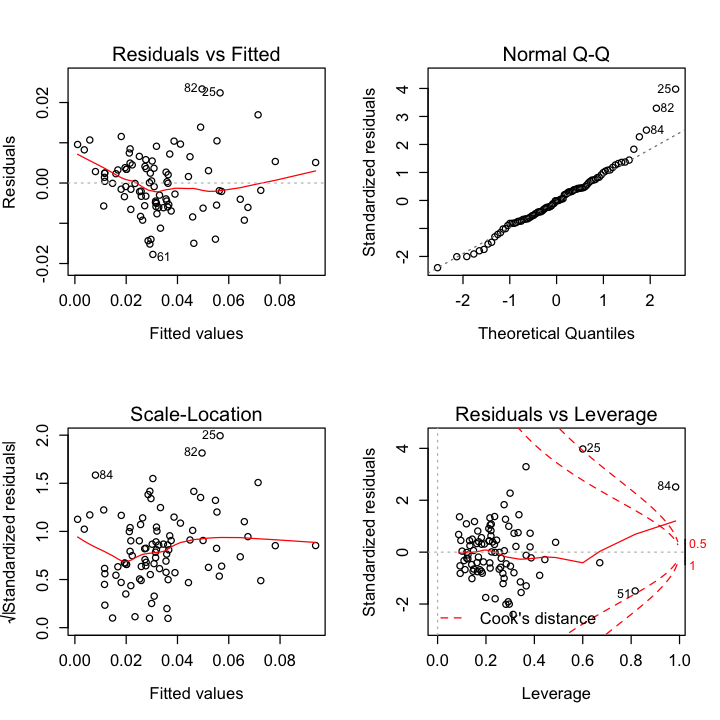

In [53]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.3)

Observations:
* a) The parabolic shape of the splice curve in the residual vs fitted plot suggest that at least one of the key explnatory variables is exogenous, and the curve is more pronounced than for previous models.
* b) The scale location plot suggest that the residuals are heteroscedastic.
* c) The normal Q-Q plot suggest that the distribution of residuals is non-normal. 
* d) The Residuals vs leverage plot suggests that obbservation 51 is an outlier that has greatly influenced the model.

With similar observations to our first model, our responses to these concerns are the same as before.
Responses:
4. Zero Conditional Mean: <br> To address a violation of zero conditional mean, we could try to identify Omitted Variables that were not accounted for in the dataset.
5. Heteroskedasticity: <br> To address the model's heteroscedasticity, we will use heteroscedasticity-robust standard errors when making inferences about the coefficients.
6. Normality of Errors: <br> Although the distribution of residuals is non-normal, the plot also suggests that the skew of the residual distribution is not extreme. This observation, together with the sample size of 91 (greater than 30), lets us invoke the Central Limit Theorem and be confident that the sampling distribution of the model's coefficients is normal.

# Omitted Variables



We believe our models may suffer from OVB from covariates that are not available in the given dataset. We identify and elaborate on these concerns individually in the below discussion:

### Density
Our density variable measures total county population divided by the size of the county, but does not account for the distribution of density within the county. In addition to this density variable, it would be helpful to have an intra-county density distribution gini-coefficient variable. Having access to this variable would better inform policy at the county level.

The direction of this OVB is upwards, large and away from 0.
Highly dense areas within a county would increase the density metric for a county, thereby biasing our beta term upwards. 
Since our beta associated with density is positive, an upward bias would imply that bias is away from 0. There are no close proxies for this density metric.

### Percent Youth Male

We believe the pctymle variable may suffer from OVB because it doesn’t account for age nor gender distribution in a county. As such, an average or median age variable and/or gender variable would be helpful in understanding the roles that age and gender demographics play in crime rates. Perhaps an interaction term between average age and gender would be appropriate. 

The direction of this OVB is upwards, small, and away from 0. Intuitively, a higher percentage of young males in a county may be associated with a higher crime rate, thereby biasing our beta term upwards. Since our beta associated with density is positive, an upward bias would imply that bias is away from 0.

### Wage Variables

Our various wage variables may suffer from OVB because they don’t account for other metrics of economic opportunity, such as unemployment rates and income inequality in a given county. As such, the county’s unemployment rate and income inequality gini coefficient could be helpful to include in a model.

Considering that some of the wage variables in model 3 have a negative effect on crime rates, and that some have a positive effect, it is difficult to determine the direction and magnitude of OVB.
There are no close proxies for these wage metrics in the dataset.

### Police per Capita

The polpc variable may suffer from OVB as an inadequate metric for the relationship between police and the residents of the county. As such, an “attitude towards police” variable would be appropriate here. It addition, it would be interesting to compare this variable with a “attitude of police officers towards their county” variable.

The direction of this OVB is upwards, large and away from 0. A large police presence in a given county could be in response to high crime rates. However, this notion doesn’t capture the nature of the relationship between the police and its residents. Moreover, a large police presence could result in more opportunity of crimes being caught. This would thereby indicate a positive, upwards bias away from 0.

### Offense Mix

Our offense mix variable would suffer from OVB because the ratio of face to face crimes may not be an adequate metric in explaining increases of crime. To elaborate, some face to face crimes includes those of a violent or sexual nature, which are more sporadic and less attributable to societal structures. Furthermore, we believe that a metric of crime which is more attuned to the ratio of crimes that are economic in nature (such as robbery and theft) is more appropriate for this model. 

# Model Summaries

In [40]:
install.packages('stargazer')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [41]:
library('stargazer')


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [42]:
?stargazer

In [43]:
stargazer(model.1.1, model.2.2, model.3, type = "text", omit.stat = "f",
          star.cutoffs = c(0.05, 0.01, 0.001))



                                  Dependent variable:              
                    -----------------------------------------------
                                        crmrte                     
                          (1)             (2)             (3)      
-------------------------------------------------------------------
prbarr                                                 -0.046***   
                                                        (0.011)    
                                                                   
log.density            0.027***        0.023***        0.022***    
                        (0.004)         (0.004)         (0.004)    
                                                                   
polpc                  8.091***          1.868           2.220     
                        (2.263)         (2.349)         (2.189)    
                                                                   
taxpc                                          

# Recommendations